In [202]:
import matplotlib.pyplot as plt
import cv2

In [203]:
im = cv2.imread("Cat03.jpg")

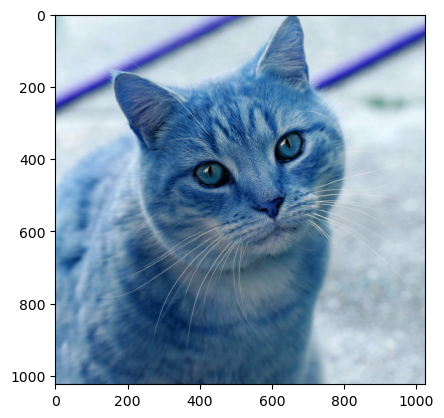

In [204]:
plt.imshow(im)

In [205]:
im

array([[[179, 208, 217],
        [178, 207, 216],
        [176, 207, 216],
        ...,
        [210, 222, 232],
        [210, 222, 232],
        [209, 221, 231]],

       [[179, 208, 217],
        [178, 207, 216],
        [176, 207, 216],
        ...,
        [210, 222, 232],
        [210, 222, 232],
        [210, 222, 232]],

       [[179, 208, 217],
        [178, 207, 216],
        [175, 206, 215],
        ...,
        [210, 222, 232],
        [210, 222, 232],
        [210, 222, 234]],

       ...,

       [[118, 152, 182],
        [119, 153, 183],
        [121, 155, 185],
        ...,
        [197, 213, 225],
        [197, 213, 225],
        [197, 213, 225]],

       [[117, 151, 181],
        [118, 152, 182],
        [120, 154, 184],
        ...,
        [197, 213, 225],
        [197, 213, 225],
        [196, 212, 224]],

       [[116, 150, 180],
        [117, 151, 181],
        [119, 153, 183],
        ...,
        [197, 213, 225],
        [197, 213, 225],
        [198, 214, 226]]

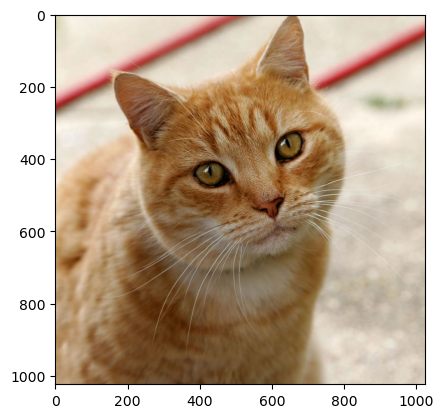

In [206]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('Cat03.jpg')

plt.imshow(image)

In [207]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

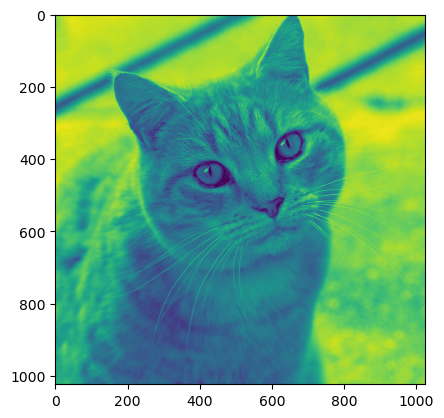

In [208]:
plt.imshow(gray)

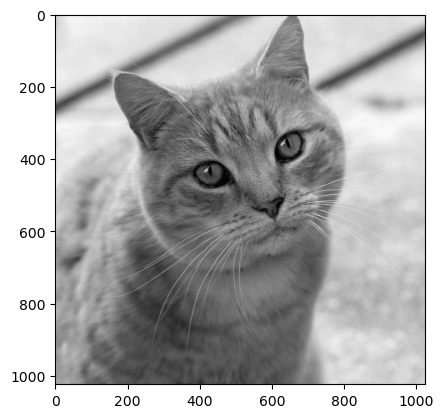

In [209]:
plt.imshow(gray, cmap='gray')

In [210]:
sobel_y = np.array([[-1,2,-1],
                   [0,0,0],
                   [1,2,1]])

sobel_x = np.array([[-1,0,1],
                   [-2,0,2],
                   [-1,0,1]])

In [211]:
#filter the image using filter2D(grayscale image, bit-depth, kernal)

filtered_image1 = cv2.filter2D(gray, -1, sobel_x)
filtered_image2 = cv2.filter2D(gray, -1, sobel_y)

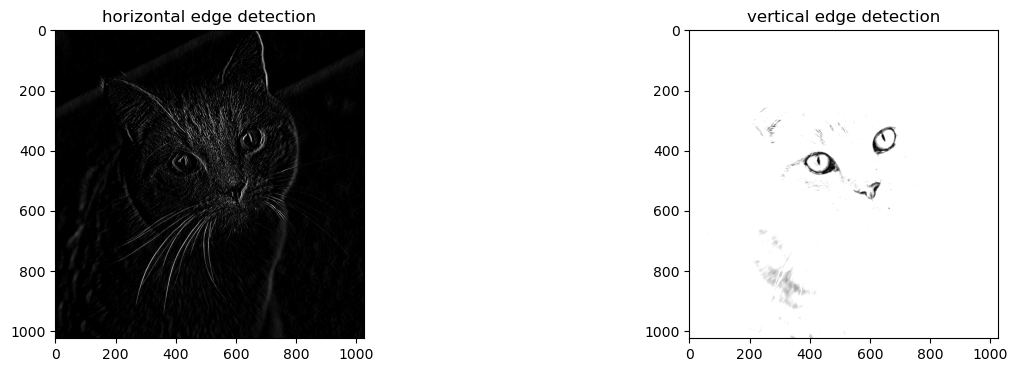

In [212]:
f, ax = plt.subplots(1, 2, figsize=(15, 4))
ax[0].set_title('horizontal edge detection')
ax[0].imshow(filtered_image1, cmap='gray')
ax[1].set_title('vertical edge detection')
ax[1].imshow(filtered_image2, cmap='gray')

## CNN Example using MINIST dataset

MNIST is one of the most famous datasets in the field of machine learning.
 - It has 70,000 images of hand-written digits
 - Very straight forward to download
 - Images dimensions are 28x28
 - Grayscale images

In [213]:
from tensorflow.keras.datasets import mnist

In [214]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [215]:
print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


In [216]:
import numpy as np
import matplotlib.pyplot as plt

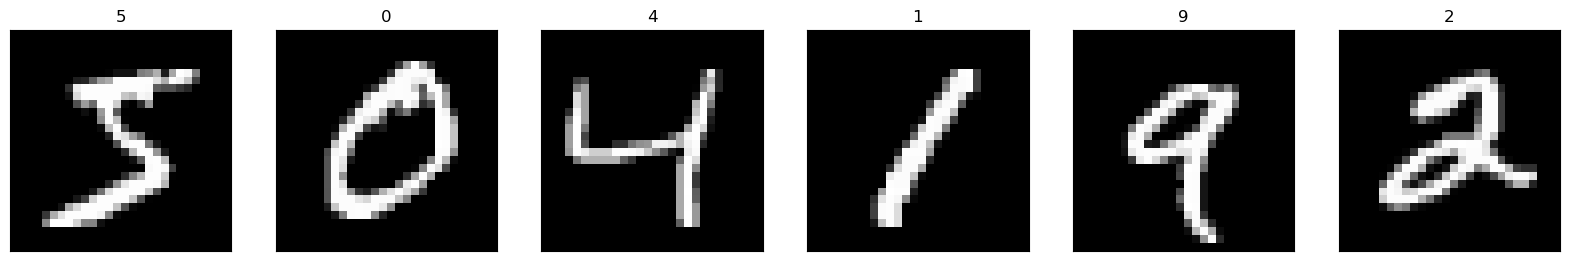

In [217]:
fig = plt.figure(figsize = (20,20))
for i in range (6):
    ax = fig.add_subplot(1,6, i+1, xticks = [],yticks = [])
    ax.imshow(X_train[i], cmap = 'gray')
    ax.set_title(str(y_train[i]))

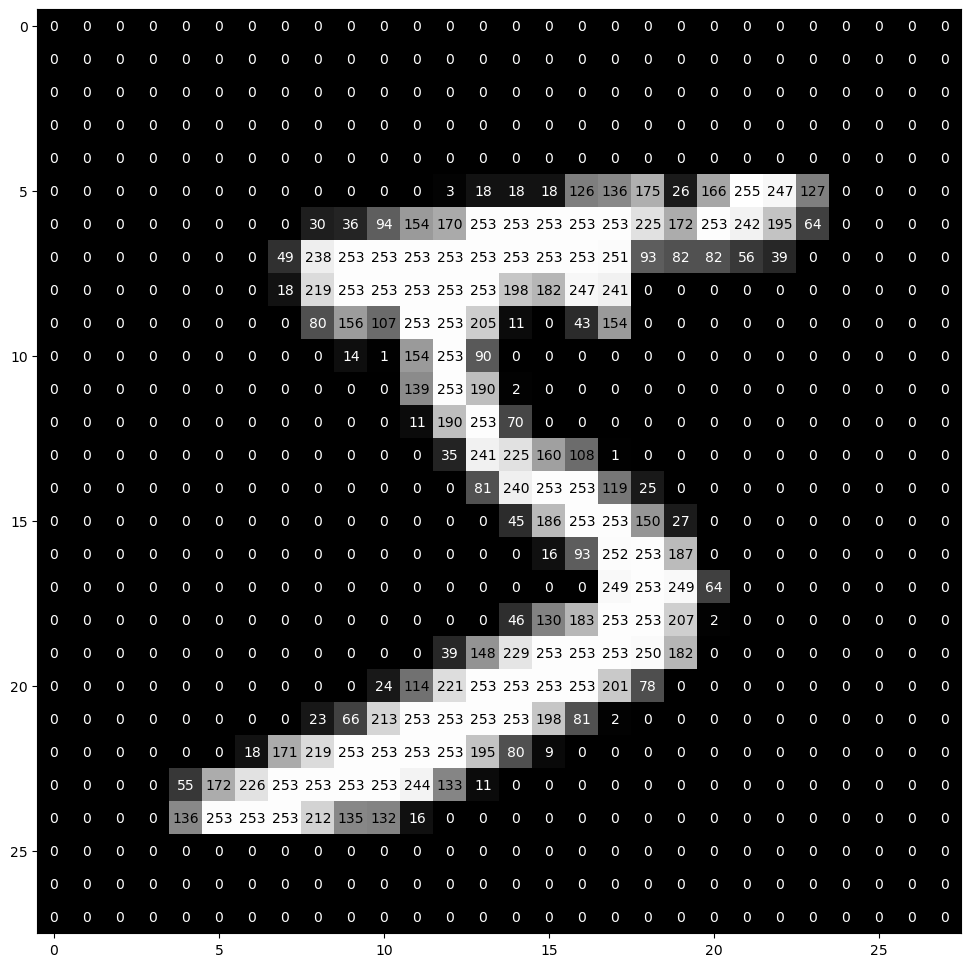

In [218]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

In [219]:
X_train = X_train/255
X_test = X_test/255

In [220]:
X_train.shape

(60000, 28, 28)

In [221]:
X_test.shape

(10000, 28, 28)

In [222]:
img_rows = 28
column_rows = 28

X_train = X_train.reshape(X_train.shape[0],img_rows,column_rows,1)
X_test = X_test.reshape(X_test.shape[0], img_rows,column_rows,1)

input_shape = (img_rows,column_rows)

In [223]:
print (X_train.shape)
print(X_test.shape)
print(input_shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(28, 28)


In [224]:
from keras.utils import np_utils

num_classes = 10
# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [225]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [226]:
model = Sequential()

model.add(Conv2D(32,kernel_size =( 3,3), padding = 'same',activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size= (2,2)))

model.add(Conv2D(64, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

In [227]:
model.add(Flatten())

In [228]:
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [229]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [230]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### adding callback functions
early stopping
model checkpoint

In [231]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [232]:
callback = ModelCheckpoint(filepath='model.wieghts.best.hdf5', verbose = 1, save_best_only=True)

In [233]:
history = model.fit(X_train,y_train,callbacks=[callback], epochs = 10, batch_size=30, validation_split= 0.20, verbose = 2 )

Epoch 1/10



Epoch 1: val_loss improved from inf to 0.06944, saving model to model.wieghts.best.hdf5
1600/1600 - 21s - loss: 0.1553 - accuracy: 0.9536 - val_loss: 0.0694 - val_accuracy: 0.9787 - 21s/epoch - 13ms/step
Epoch 2/10

Epoch 2: val_loss improved from 0.06944 to 0.04385, saving model to model.wieghts.best.hdf5
1600/1600 - 20s - loss: 0.0509 - accuracy: 0.9835 - val_loss: 0.0439 - val_accuracy: 0.9862 - 20s/epoch - 12ms/step
Epoch 3/10

Epoch 3: val_loss did not improve from 0.04385
1600/1600 - 19s - loss: 0.0333 - accuracy: 0.9890 - val_loss: 0.0449 - val_accuracy: 0.9872 - 19s/epoch - 12ms/step
Epoch 4/10

Epoch 4: val_loss did not improve from 0.04385
1600/1600 - 20s - loss: 0.0247 - accuracy: 0.9923 - val_loss: 0.0485 - val_accuracy: 0.9854 - 20s/epoch - 12ms/step
Epoch 5/10

Epoch 5: val_loss improved from 0.04385 to 0.03750, saving model to model.wieghts.best.hdf5
1600/1600 - 20s - loss: 0.0184 - accuracy: 0.9940 - val_loss: 0.0375 - val_accuracy: 0.9888 - 20s/epoch - 12ms/step
Epoch

In [234]:
type(history)

keras.callbacks.History

In [235]:
history.history

{'loss': [0.15526124835014343,
  0.05087772011756897,
  0.033326245844364166,
  0.024691645056009293,
  0.01835012063384056,
  0.014541886746883392,
  0.011230935342609882,
  0.009728619828820229,
  0.006795878056436777,
  0.0059840744361281395],
 'accuracy': [0.9535624980926514,
  0.9835416674613953,
  0.9889583587646484,
  0.992270827293396,
  0.9940416812896729,
  0.9947500228881836,
  0.9962083101272583,
  0.9967708587646484,
  0.9977291822433472,
  0.9977916479110718],
 'val_loss': [0.06944336742162704,
  0.04385264590382576,
  0.04491134732961655,
  0.04852927476167679,
  0.037504758685827255,
  0.0454145148396492,
  0.04404821619391441,
  0.04474368318915367,
  0.05001816898584366,
  0.04431258514523506],
 'val_accuracy': [0.9786666631698608,
  0.9862499833106995,
  0.9872499704360962,
  0.9854166507720947,
  0.9888333082199097,
  0.9884166717529297,
  0.9887499809265137,
  0.9890000224113464,
  0.9900833368301392,
  0.9910833239555359]}

In [236]:
import pandas as pd
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.155261,0.953562,0.069443,0.978667
1,0.050878,0.983542,0.043853,0.986250
2,0.033326,0.988958,0.044911,0.987250
3,0.024692,0.992271,0.048529,0.985417
4,0.018350,0.994042,0.037505,0.988833
5,0.014542,0.994750,0.045415,0.988417
6,0.011231,0.996208,0.044048,0.988750
7,0.009729,0.996771,0.044744,0.989000
8,0.006796,0.997729,0.050018,0.990083
9,0.005984,0.997792,0.044313,0.991083


<Axes: >

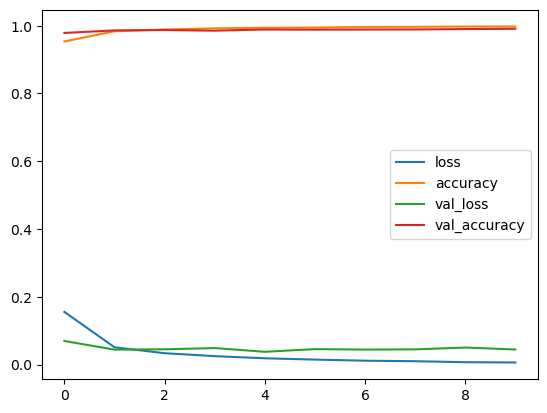

In [237]:
pd.DataFrame(history.history).plot()

In [238]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0398 - accuracy: 0.9909


[0.03983956575393677, 0.9908999800682068]

In [239]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [240]:
from sklearn.metrics import accuracy_score, confusion_matrix , precision_score, recall_score

In [243]:
y_pred_classes = np.argmax(y_pred, axis = 1)
y_test_classes = np.argmax(y_test, axis = 1)

In [244]:
confusion_matrix(y_test_classes,y_pred_classes)

array([[ 976,    0,    0,    0,    0,    0,    2,    1,    1,    0],
       [   0, 1129,    1,    0,    2,    0,    0,    1,    2,    0],
       [   1,    0, 1024,    0,    0,    0,    0,    2,    5,    0],
       [   0,    0,    1, 1004,    0,    4,    0,    0,    1,    0],
       [   1,    0,    0,    0,  972,    0,    1,    1,    3,    4],
       [   1,    0,    0,    5,    0,  885,    1,    0,    0,    0],
       [   6,    1,    0,    1,    0,    4,  943,    0,    3,    0],
       [   1,    1,    3,    0,    0,    0,    0, 1019,    1,    3],
       [   3,    0,    2,    0,    0,    0,    0,    1,  966,    2],
       [   1,    2,    1,    1,    3,    5,    0,    2,    3,  991]])

In [245]:
accuracy_score(y_test_classes,y_pred_classes)

0.9909

In [247]:
recall_score(y_test_classes,y_pred_classes, average = 'micro')

0.9909

In [249]:
model.load_weights('/Users/abhishekwaghchaure/Desktop/PWSkillsDataScience/model.wieghts.best.hdf5')

In [250]:
y_test[23]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [254]:
np.argmax(X_test[23])

161

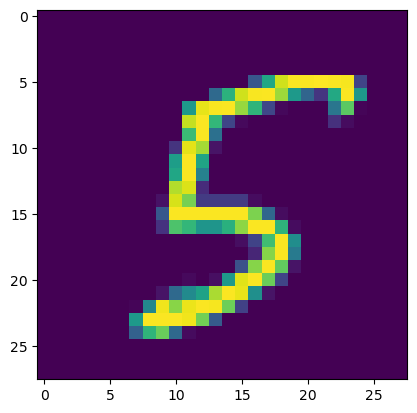

: 

In [255]:
plt.imshow(X_test[23])

## Performing CNN on RGB Images 
used CIFAR-10 dataset

In [20]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import keras

In [2]:
(X_train,y_train), (X_test,y_test) = cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

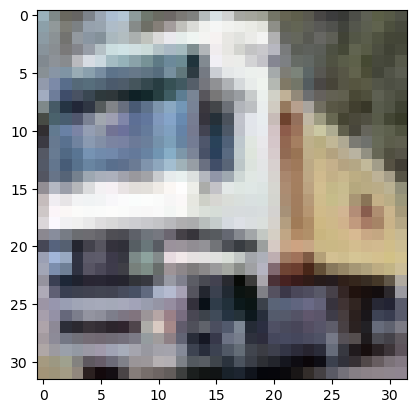

In [6]:
plt.imshow(X_train[1])

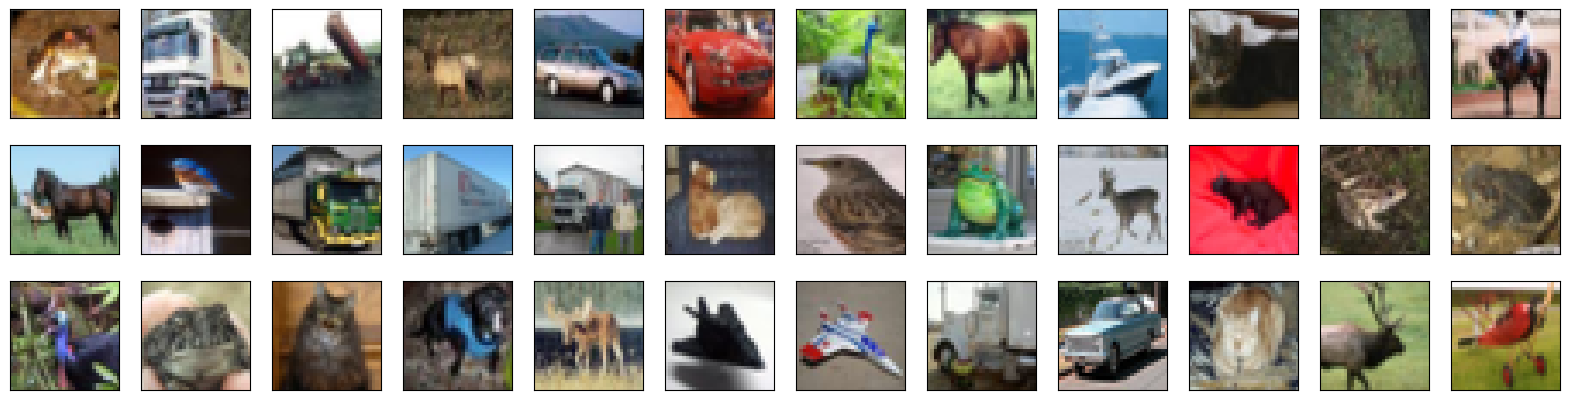

In [18]:
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3,12, i+1, xticks=[], yticks = [])
    ax.imshow(np.squeeze(X_train[i]))

## image rescaling by dividing each pixel by 255

In [19]:
X_train = X_train/255
X_test = X_test/255

## One hot label encoding to the labelled data

In [21]:
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [23]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

## Designing CNN model

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D

In [30]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), padding = 'same', activation = 'relu', input_shape = (32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(500, activation='relu'))

model.add(Dropout(0.4))

model.add(Dense(10, activation='softmax'))
          

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 64)        

In [32]:
model.compile(loss='categorical_crossentropy', metrics = ['accuracy'], optimizer='rmsprop')

In [33]:
from keras.callbacks import ModelCheckpoint

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)

history = model.fit(X_train, y_train, batch_size=32, epochs=1,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=2, shuffle=True)


Epoch 1: val_loss improved from inf to 1.26373, saving model to model.weights.best.hdf5
1250/1250 - 21s - loss: 1.5627 - accuracy: 0.4360 - val_loss: 1.2637 - val_accuracy: 0.5496 - 21s/epoch - 17ms/step


In [35]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.2492 - accuracy: 0.5578


[1.2491945028305054, 0.5577999949455261]

In [36]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


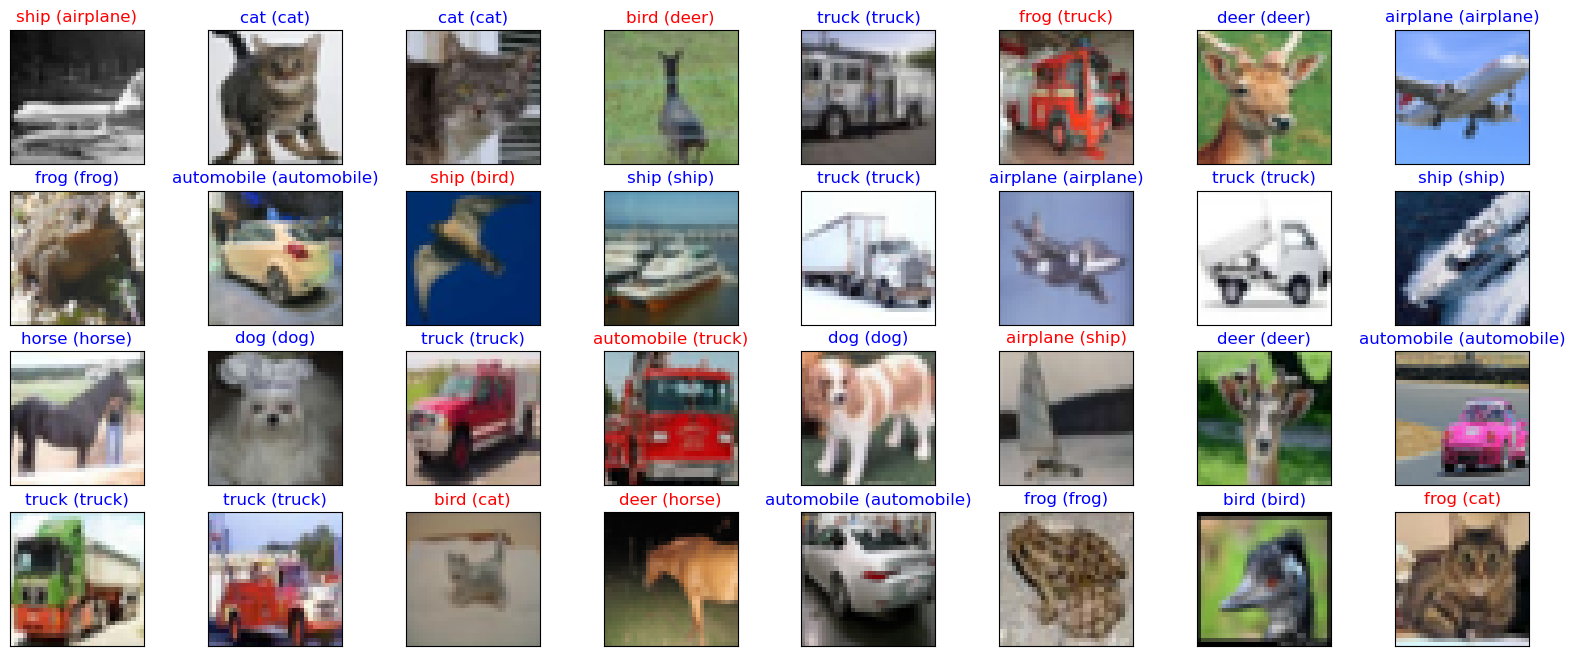

In [41]:
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))